In [ ]:
#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [2]:
#Image Properties
Image_Width=128
Image_Height=128
Image_Channel=3
Image_Size=(Image_Width,Image_Height)

In [3]:
#Preparing dataset
#(The code in this cell is inspired from a blog by DATAFLAIR TEAM)
filenames=os.listdir("./Data/train")
categories=[]
for f_name in filenames:
    category=f_name[0]
    if category== "P":
        categories.append(2)
    elif category=="N":
        categories.append(0)
    else:
        categories.append(1)


In [4]:
df=pd.DataFrame({"filenames":filenames,"category":categories})

In [5]:
df

,filenames,category
0,COVID-19 (10).png,1
1,COVID-19 (100).png,1
2,COVID-19 (101).png,1
3,COVID-19 (102).png,1
4,COVID-19 (103).png,1
...,...,...
5357,PNEUMONIA(992).jpg,2
5358,PNEUMONIA(993).jpg,2
5359,PNEUMONIA(994).jpg,2
5360,PNEUMONIA(997).jpg,2


In [6]:
df=df.sample(frac=1).reset_index(drop=True)
df

,filenames,category
0,PNEUMONIA(2022).jpg,2
1,NORMAL(23).jpg,0
2,PNEUMONIA(3239).jpg,2
3,PNEUMONIA(208).jpg,2
4,NORMAL(1191).jpg,0
...,...,...
5357,COVID-19 (28).png,1
5358,PNEUMONIA(1904).jpg,2
5359,PNEUMONIA(3543).jpg,2
5360,PNEUMONIA(2434).jpg,2


In [7]:
df["category"]=df["category"].replace({0:"Normal",1:"Corona_Positive",2:"Pneumonia"})
df

,filenames,category
0,PNEUMONIA(2022).jpg,Pneumonia
1,NORMAL(23).jpg,Normal
2,PNEUMONIA(3239).jpg,Pneumonia
3,PNEUMONIA(208).jpg,Pneumonia
4,NORMAL(1191).jpg,Normal
...,...,...
5357,COVID-19 (28).png,Corona_Positive
5358,PNEUMONIA(1904).jpg,Pneumonia
5359,PNEUMONIA(3543).jpg,Pneumonia
5360,PNEUMONIA(2434).jpg,Pneumonia


In [8]:
train_df,validate_df=train_test_split(df,test_size=0.20,random_state=42)
train_df=train_df.reset_index(drop=True)
validate_df=validate_df.reset_index(drop=True)

In [9]:
train_df

,filenames,category
0,PNEUMONIA(2558).jpg,Pneumonia
1,PNEUMONIA(3409).jpg,Pneumonia
2,PNEUMONIA(4201).jpg,Pneumonia
3,PNEUMONIA(329).jpg,Pneumonia
4,NORMAL(838).jpg,Normal
...,...,...
4284,PNEUMONIA(3515).jpg,Pneumonia
4285,PNEUMONIA(2207).jpg,Pneumonia
4286,PNEUMONIA(1053).jpg,Pneumonia
4287,COVID-19(141).png,Corona_Positive


In [10]:
validate_df

,filenames,category
0,COVID19(201).jpg,Corona_Positive
1,PNEUMONIA(864).jpg,Pneumonia
2,NORMAL(268).jpg,Normal
3,PNEUMONIA(4118).jpg,Pneumonia
4,COVID19(373).jpg,Corona_Positive
...,...,...
1068,COVID-19 (100).png,Corona_Positive
1069,COVID19(413).jpg,Corona_Positive
1070,PNEUMONIA(24).jpg,Pneumonia
1071,NORMAL(577).jpg,Normal


In [11]:
total_train=train_df.shape[0]
total_validate=validate_df.shape[0]
batch_size=20

In [12]:
total_train,total_validate

(4289, 1073)

In [13]:
train_datagen=ImageDataGenerator(rotation_range=15,rescale=1./255,shear_range=0.1,zoom_range=0.2,horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)
train_generator=train_datagen.flow_from_dataframe(train_df,"./Data/train",x_col="filenames",y_col="category",target_size=Image_Size,class_mode="categorical",batch_size=batch_size)

Found 4289 validated image filenames belonging to 3 classes.


In [14]:
validation_datagen=ImageDataGenerator(rescale=1./255)
validation_genertor=validation_datagen.flow_from_dataframe(validate_df,"./Data/train",x_col="filenames",y_col="category",target_size=Image_Size,class_mode="categorical",batch_size=batch_size)

Found 1073 validated image filenames belonging to 3 classes.


In [15]:
#Creating neural model
import tensorflow as tf
import keras
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization
model=tf.keras.models.Sequential()
#First Layer
model.add(Conv2D(32,(3,3),input_shape=[128,128,3],activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))
#Second Layer
model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))
#Third Layer
model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))
#Final Layer
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(3,activation="softmax"))


In [39]:
model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.SGD(momentum=0.9),metrics=["accuracy"])

In [40]:
#Call backs
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
earlystop=EarlyStopping(patience=10)
learning_rate_reduction=ReduceLROnPlateau(monitor="val_accuracy",patience=2,verbose=1,factor=0.5,min_lr=0.00001)
call_backs=[earlystop,learning_rate_reduction]

In [53]:
#Training
epochs=20
history=model.fit_generator(train_generator,epochs=epochs,validation_data=validation_genertor,validation_steps=total_validate/batch_size,steps_per_epoch=total_train/batch_size,callbacks=call_backs)

Epoch 1/20
215/214 [==============================] - 342s 2s/step - loss: 0.2447 - accuracy: 0.9179 - val_loss: 0.3369 - val_accuracy: 0.8695 - lr: 0.0012
Epoch 2/20
215/214 [==============================] - 341s 2s/step - loss: 0.2263 - accuracy: 0.9224 - val_loss: 0.6584 - val_accuracy: 0.7801 - lr: 0.0012
Epoch 3/20
215/214 [==============================] - 340s 2s/step - loss: 0.2143 - accuracy: 0.9280 - val_loss: 0.1970 - val_accuracy: 0.9329 - lr: 0.0012
Epoch 4/20
215/214 [==============================] - 358s 2s/step - loss: 0.2192 - accuracy: 0.9242 - val_loss: 0.2344 - val_accuracy: 0.9282 - lr: 0.0012
Epoch 5/20
215/214 [==============================] - ETA: -1s - loss: 0.2003 - accuracy: 0.9280
Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0006249999860301614.
215/214 [==============================] - 560s 3s/step - loss: 0.2003 - accuracy: 0.9280 - val_loss: 1.7308 - val_accuracy: 0.5098 - lr: 0.0012
Epoch 6/20
215/214 [==============================] - 

In [54]:
#Saving the model
model.save("Covid-19_Predictor_FinalModel.h5")

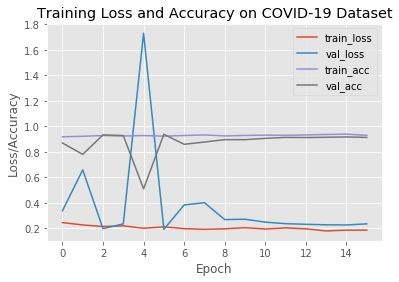

In [69]:
# plotting the training loss and accuracy
epoch = 16
plt.plot(np.arange(0, epoch), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epoch), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epoch), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epoch), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

In [58]:
covid=tf.keras.models.load_model("Covid-19_Predictor_FinalModel.h5")